In [2]:
# libraries for data manipultion
import pandas as pd
import numpy as np

# libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#ml libraries
from sklearn.linear_model import LinearRegression

#stats lib
import statsmodels.api as sm

In [3]:
tr_eikon_df = pd.read_csv('tr_eikon_eod_data.csv')
tr_eikon_df.index = pd.to_datetime(tr_eikon_df['Date'])
tr = tr_eikon_df[['AAPL.O', 'MSFT.O', 'INTC.O', 'AMZN.O', 'GS.N']].dropna()
store = tr.copy(deep = True)

#covert returns to PERCENTAGE CHANGE
for col in tr.columns:
    tr['Returns' + " " + col] = tr[col].pct_change() * 100

tr = tr.dropna()
tr

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,Returns AAPL.O,Returns MSFT.O,Returns INTC.O,Returns AMZN.O,Returns GS.N
Date,,,,,,,,,,
2010-01-05,30.625684,30.960,20.87,134.690,176.14,0.172889,0.032310,-0.047893,0.589993,1.767969
2010-01-06,30.138541,30.770,20.80,132.250,174.26,-1.590633,-0.613695,-0.335410,-1.811567,-1.067333
2010-01-07,30.082827,30.452,20.60,130.000,177.67,-0.184860,-1.033474,-0.961538,-1.701323,1.956846
2010-01-08,30.282827,30.660,20.83,133.520,174.31,0.664830,0.683042,1.116505,2.707692,-1.891147
2010-01-11,30.015684,30.270,20.95,130.308,171.56,-0.882159,-1.272016,0.576092,-2.405632,-1.577649
...,...,...,...,...,...,...,...,...,...,...
2018-06-25,182.170000,98.390,50.71,1663.150,221.54,-1.487130,-2.011752,-3.409524,-3.061195,-1.982125
2018-06-26,184.430000,99.080,49.67,1691.090,221.58,1.240599,0.701291,-2.050878,1.679945,0.018055
2018-06-27,184.160000,97.540,48.76,1660.510,220.18,-0.146397,-1.554300,-1.832092,-1.808301,-0.631826


<Axes: xlabel='Date'>

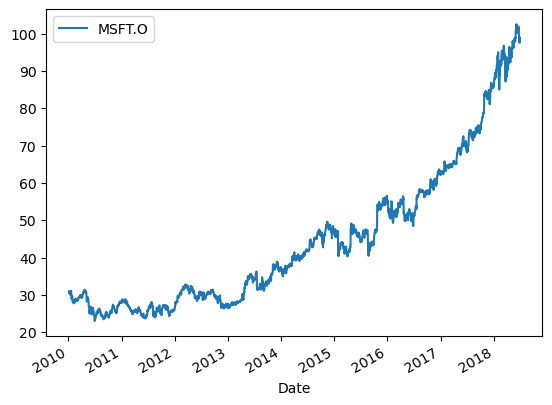

In [50]:
store[['MSFT.O']].plot()

In [4]:
#read the fama data collected from the website

#website for fama french data: https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html

#data collected under fama french 3 factors [daily]

#original data was manually edited as there was parsing issues

fama = pd.read_csv('fama.csv')
fama['Date'] = fama['Date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
fama.index = pd.to_datetime(fama['Date'])

In [5]:
data = pd.merge(tr, fama, left_index=True, right_index=True)
data

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,Returns AAPL.O,Returns MSFT.O,Returns INTC.O,Returns AMZN.O,Returns GS.N,Date,Mkt-RF,SMB,HML,RF
Date,,,,,,,,,,,,,,,
2010-01-05,30.625684,30.960,20.87,134.690,176.14,0.172889,0.032310,-0.047893,0.589993,1.767969,2010-01-05,0.31,-0.64,1.24,0.000
2010-01-06,30.138541,30.770,20.80,132.250,174.26,-1.590633,-0.613695,-0.335410,-1.811567,-1.067333,2010-01-06,0.13,-0.22,0.57,0.000
2010-01-07,30.082827,30.452,20.60,130.000,177.67,-0.184860,-1.033474,-0.961538,-1.701323,1.956846,2010-01-07,0.40,0.09,0.98,0.000
2010-01-08,30.282827,30.660,20.83,133.520,174.31,0.664830,0.683042,1.116505,2.707692,-1.891147,2010-01-08,0.33,0.37,0.01,0.000
2010-01-11,30.015684,30.270,20.95,130.308,171.56,-0.882159,-1.272016,0.576092,-2.405632,-1.577649,2010-01-11,0.13,-0.13,-0.25,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,182.170000,98.390,50.71,1663.150,221.54,-1.487130,-2.011752,-3.409524,-3.061195,-1.982125,2018-06-25,-1.48,-0.54,0.57,0.006
2018-06-26,184.430000,99.080,49.67,1691.090,221.58,1.240599,0.701291,-2.050878,1.679945,0.018055,2018-06-26,0.27,0.63,-0.24,0.006
2018-06-27,184.160000,97.540,48.76,1660.510,220.18,-0.146397,-1.554300,-1.832092,-1.808301,-0.631826,2018-06-27,-1.02,-1.00,0.36,0.006


In [6]:
#generate directions for each stock
for col in store.columns:
    data[col + ' direction'] = np.sign(data['Returns' + ' ' + col])
    
data

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,Returns AAPL.O,Returns MSFT.O,Returns INTC.O,Returns AMZN.O,Returns GS.N,Date,Mkt-RF,SMB,HML,RF,AAPL.O direction,MSFT.O direction,INTC.O direction,AMZN.O direction,GS.N direction
Date,,,,,,,,,,,,,,,,,,,,
2010-01-05,30.625684,30.960,20.87,134.690,176.14,0.172889,0.032310,-0.047893,0.589993,1.767969,2010-01-05,0.31,-0.64,1.24,0.000,1.0,1.0,-1.0,1.0,1.0
2010-01-06,30.138541,30.770,20.80,132.250,174.26,-1.590633,-0.613695,-0.335410,-1.811567,-1.067333,2010-01-06,0.13,-0.22,0.57,0.000,-1.0,-1.0,-1.0,-1.0,-1.0
2010-01-07,30.082827,30.452,20.60,130.000,177.67,-0.184860,-1.033474,-0.961538,-1.701323,1.956846,2010-01-07,0.40,0.09,0.98,0.000,-1.0,-1.0,-1.0,-1.0,1.0
2010-01-08,30.282827,30.660,20.83,133.520,174.31,0.664830,0.683042,1.116505,2.707692,-1.891147,2010-01-08,0.33,0.37,0.01,0.000,1.0,1.0,1.0,1.0,-1.0
2010-01-11,30.015684,30.270,20.95,130.308,171.56,-0.882159,-1.272016,0.576092,-2.405632,-1.577649,2010-01-11,0.13,-0.13,-0.25,0.000,-1.0,-1.0,1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,182.170000,98.390,50.71,1663.150,221.54,-1.487130,-2.011752,-3.409524,-3.061195,-1.982125,2018-06-25,-1.48,-0.54,0.57,0.006,-1.0,-1.0,-1.0,-1.0,-1.0
2018-06-26,184.430000,99.080,49.67,1691.090,221.58,1.240599,0.701291,-2.050878,1.679945,0.018055,2018-06-26,0.27,0.63,-0.24,0.006,1.0,1.0,-1.0,1.0,1.0
2018-06-27,184.160000,97.540,48.76,1660.510,220.18,-0.146397,-1.554300,-1.832092,-1.808301,-0.631826,2018-06-27,-1.02,-1.00,0.36,0.006,-1.0,-1.0,-1.0,-1.0,-1.0


In [7]:
data = data.drop(columns = ['Date'])

In [8]:
#get relevant data for ml
data = data.iloc[:, 5:]

data

,Returns AAPL.O,Returns MSFT.O,Returns INTC.O,Returns AMZN.O,Returns GS.N,Mkt-RF,SMB,HML,RF,AAPL.O direction,MSFT.O direction,INTC.O direction,AMZN.O direction,GS.N direction
Date,,,,,,,,,,,,,,
2010-01-05,0.172889,0.032310,-0.047893,0.589993,1.767969,0.31,-0.64,1.24,0.000,1.0,1.0,-1.0,1.0,1.0
2010-01-06,-1.590633,-0.613695,-0.335410,-1.811567,-1.067333,0.13,-0.22,0.57,0.000,-1.0,-1.0,-1.0,-1.0,-1.0
2010-01-07,-0.184860,-1.033474,-0.961538,-1.701323,1.956846,0.40,0.09,0.98,0.000,-1.0,-1.0,-1.0,-1.0,1.0
2010-01-08,0.664830,0.683042,1.116505,2.707692,-1.891147,0.33,0.37,0.01,0.000,1.0,1.0,1.0,1.0,-1.0
2010-01-11,-0.882159,-1.272016,0.576092,-2.405632,-1.577649,0.13,-0.13,-0.25,0.000,-1.0,-1.0,1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,-1.487130,-2.011752,-3.409524,-3.061195,-1.982125,-1.48,-0.54,0.57,0.006,-1.0,-1.0,-1.0,-1.0,-1.0
2018-06-26,1.240599,0.701291,-2.050878,1.679945,0.018055,0.27,0.63,-0.24,0.006,1.0,1.0,-1.0,1.0,1.0
2018-06-27,-0.146397,-1.554300,-1.832092,-1.808301,-0.631826,-1.02,-1.00,0.36,0.006,-1.0,-1.0,-1.0,-1.0,-1.0


In [9]:
#train test split 80/20
preddat = data.copy(deep = True)
split = int(0.8 * len(preddat))
data_train = preddat[: split]
data_test = preddat[split:]
preddat

,Returns AAPL.O,Returns MSFT.O,Returns INTC.O,Returns AMZN.O,Returns GS.N,Mkt-RF,SMB,HML,RF,AAPL.O direction,MSFT.O direction,INTC.O direction,AMZN.O direction,GS.N direction
Date,,,,,,,,,,,,,,
2010-01-05,0.172889,0.032310,-0.047893,0.589993,1.767969,0.31,-0.64,1.24,0.000,1.0,1.0,-1.0,1.0,1.0
2010-01-06,-1.590633,-0.613695,-0.335410,-1.811567,-1.067333,0.13,-0.22,0.57,0.000,-1.0,-1.0,-1.0,-1.0,-1.0
2010-01-07,-0.184860,-1.033474,-0.961538,-1.701323,1.956846,0.40,0.09,0.98,0.000,-1.0,-1.0,-1.0,-1.0,1.0
2010-01-08,0.664830,0.683042,1.116505,2.707692,-1.891147,0.33,0.37,0.01,0.000,1.0,1.0,1.0,1.0,-1.0
2010-01-11,-0.882159,-1.272016,0.576092,-2.405632,-1.577649,0.13,-0.13,-0.25,0.000,-1.0,-1.0,1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,-1.487130,-2.011752,-3.409524,-3.061195,-1.982125,-1.48,-0.54,0.57,0.006,-1.0,-1.0,-1.0,-1.0,-1.0
2018-06-26,1.240599,0.701291,-2.050878,1.679945,0.018055,0.27,0.63,-0.24,0.006,1.0,1.0,-1.0,1.0,1.0
2018-06-27,-0.146397,-1.554300,-1.832092,-1.808301,-0.631826,-1.02,-1.00,0.36,0.006,-1.0,-1.0,-1.0,-1.0,-1.0


Possible strategies:

1) Buy when Predicted returns > Actual returns
2) Buy when predicted direction is up

In [10]:
model = LinearRegression()

#train, predict, generate signals
accuracy = []
for col in store.columns:
    pred_returns = model.fit(data_train[['Mkt-RF','SMB','HML']], data_train['Returns' + ' ' + col]).predict(data_test[['Mkt-RF','SMB','HML']])
    pred_direction = model.fit(data_train[['Mkt-RF','SMB','HML']], data_train[col + ' direction']).predict(data_test[['Mkt-RF','SMB','HML']])
    data_test['pred_returns ' + col] = pred_returns
    data_test['pred_direc ' + col] = np.sign(pred_direction)
    data_test['Buy ' + col] = np.where((data_test['pred_returns ' + col] > data_test['Returns' + ' ' + col]),1,-1)


/var/folders/b1/75hldj_562lcklhvybmwbbz80000gn/T/ipykernel_91805/2303096008.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['pred_returns ' + col] = pred_returns
/var/folders/b1/75hldj_562lcklhvybmwbbz80000gn/T/ipykernel_91805/2303096008.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['pred_direc ' + col] = np.sign(pred_direction)
/var/folders/b1/75hldj_562lcklhvybmwbbz80000gn/T/ipykernel_91805/2303096008.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [11]:
data_test

,Returns AAPL.O,Returns MSFT.O,Returns INTC.O,Returns AMZN.O,Returns GS.N,Mkt-RF,SMB,HML,RF,AAPL.O direction,...,Buy MSFT.O,pred_returns INTC.O,pred_direc INTC.O,Buy INTC.O,pred_returns AMZN.O,pred_direc AMZN.O,Buy AMZN.O,pred_returns GS.N,pred_direc GS.N,Buy GS.N
Date,,,,,,,,,,,,,,,,,,,,,
2016-10-18,-0.068056,0.768962,1.233575,0.578141,2.147929,0.60,-0.17,0.05,0.001,-1.0,...,-1,0.634249,1.0,-1,0.756378,1.0,1,0.701248,1.0,-1
2016-10-19,-0.297948,-0.225460,-5.933775,0.004892,1.089034,0.25,0.04,0.94,0.001,-1.0,...,1,0.129919,1.0,1,-0.499233,-1.0,-1,1.210359,1.0,1
2016-10-20,-0.051230,-0.486703,-0.225289,-0.901320,0.000000,-0.16,-0.03,-0.11,0.001,-1.0,...,1,-0.148549,-1.0,1,-0.026189,-1.0,1,-0.329233,-1.0,-1
2016-10-21,-0.392961,4.209607,-0.790291,1.069948,0.091685,0.02,-0.14,-0.33,0.001,-1.0,...,-1,0.083637,1.0,1,0.402653,1.0,-1,-0.345216,-1.0,-1
2016-10-24,0.900515,2.246061,0.312945,2.332141,0.257629,0.54,0.06,-0.19,0.001,1.0,...,-1,0.550939,1.0,1,0.879581,1.0,-1,0.366419,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,-1.487130,-2.011752,-3.409524,-3.061195,-1.982125,-1.48,-0.54,0.57,0.006,-1.0,...,1,-1.454576,-1.0,1,-2.182248,-1.0,1,-1.065426,-1.0,1
2018-06-26,1.240599,0.701291,-2.050878,1.679945,0.018055,0.27,0.63,-0.24,0.006,1.0,...,-1,0.158155,1.0,1,0.541436,1.0,-1,-0.036539,1.0,-1
2018-06-27,-0.146397,-1.554300,-1.832092,-1.808301,-0.631826,-1.02,-1.00,0.36,0.006,-1.0,...,1,-0.862976,-1.0,1,-1.389483,-1.0,1,-0.727143,-1.0,-1


In [12]:
#Might be useful for analysis
#Statistical summary of regression of training data against returns
X = sm.add_constant(data_train[["Mkt-RF", "SMB", "HML"]])

for col in store.columns:
    y = data_train['Returns' + ' ' + col]
    model = sm.OLS(y, X).fit()
    print('Model summary for ' + col + '\n')
    print(model.summary())
    print('\n')

Model summary for AAPL.O

                            OLS Regression Results                            
Dep. Variable:         Returns AAPL.O   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     289.8
Date:                Thu, 04 Apr 2024   Prob (F-statistic):          5.27e-152
Time:                        15:15:41   Log-Likelihood:                -2945.5
No. Observations:                1709   AIC:                             5899.
Df Residuals:                    1705   BIC:                             5921.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0400     

F-statistics for GS.N is questionable

In [39]:
def get_backtest_data(data1, data2, sym):
    store = data1[['Returns ' + sym, 'pred_returns ' + sym, 'Buy ' + sym, 'pred_direc ' + sym]].join(data2[[sym]], how = 'inner')
    return store.copy(deep = True)

In [55]:
for col in store.columns:
    temp = get_backtest_data(data_test, tr, col)
    temp['Returns'] = np.log(temp[col] / temp[col].shift(1))
    temp['strat_returns'] = temp['Buy ' + col].shift(1) * temp['Returns']
    temp['direc_returns'] = temp['pred_direc ' + col].shift(1) * temp['Returns']
    print('Trading results for ' + col)
    print(np.exp(temp[['Returns', 'strat_returns', 'direc_returns']].sum()) - 1)
    print('\n')

Trading results for AAPL.O
Returns          0.575807
strat_returns   -0.275544
direc_returns    0.362105
dtype: float64


Trading results for MSFT.O
Returns          0.710198
strat_returns    0.526196
direc_returns   -0.082165
dtype: float64


Trading results for INTC.O
Returns          0.316821
strat_returns    0.279905
direc_returns   -0.270493
dtype: float64


Trading results for AMZN.O
Returns          1.078885
strat_returns    0.068880
direc_returns    0.592551
dtype: float64


Trading results for GS.N
Returns          0.277704
strat_returns    0.168354
direc_returns   -0.008866
dtype: float64




All the strategies underperform as compared to the benchmark strategy of just holding long. The best strategies were strategy 1 for MSFT.O and strategy 2 for AMZN.O